<a href="https://colab.research.google.com/github/ammarshibani/data-analysis-colab/blob/main/California_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Load Dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd
print("STEP 1: LOADING DATASET")
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target  # Median house value in $100,000s
print("\n➡️ Dataset first 3 rows:")
print(df.head(3))
print("\n➡️ Dataset shape:", df.shape)
print("➡️ Target variable stats:")
print(df['MedHouseVal'].describe()[['mean', 'std', 'min', 'max']])

STEP 1: LOADING DATASET

➡️ Dataset first 3 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  

➡️ Dataset shape: (20640, 9)
➡️ Target variable stats:
mean    2.068558
std     1.153956
min     0.149990
max     5.000010
Name: MedHouseVal, dtype: float64


In [ ]:
# 2. Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
print("\n\nSTEP 2: PREPROCESSING")
print("➡️ Missing values check:")
print(df.isnull().sum())
# Split data
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n➡️ Data split results:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\n➡️ Scaled features verification:")
print(f"Mean after scaling (should be ~0): {X_train_scaled.mean():.2f}")
print(f"Std deviation after scaling (should be ~1): {X_train_scaled.std():.2f}")



STEP 2: PREPROCESSING
➡️ Missing values check:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

➡️ Data split results:
Training set: 16512 samples
Testing set: 4128 samples

➡️ Scaled features verification:
Mean after scaling (should be ~0): 0.00
Std deviation after scaling (should be ~1): 1.00


In [ ]:
# 3. Train Model
from sklearn.linear_model import LinearRegression
print("\n\nSTEP 3: MODEL TRAINING")
model = LinearRegression()
model.fit(X_train_scaled, y_train)
print("➡️ Model coefficients:")
for feature, coef in zip(data.feature_names, model.coef_):
    print(f"{feature:15} → {coef:.4f}")
print(f"\nIntercept: {model.intercept_:.4f}")



STEP 3: MODEL TRAINING
➡️ Model coefficients:
MedInc          → 0.8544
HouseAge        → 0.1225
AveRooms        → -0.2944
AveBedrms       → 0.3393
Population      → -0.0023
AveOccup        → -0.0408
Latitude        → -0.8969
Longitude       → -0.8698

Intercept: 2.0719


In [ ]:
# 4. Make Predictions
print("\n\nSTEP 4: PREDICTIONS")
y_pred = model.predict(X_test_scaled)
print("➡️ First 5 predictions vs actual:")
print(pd.DataFrame({
    'Actual': y_test.head().values,
    'Predicted': y_pred[:5].round(4),
    'Difference': (y_test.head().values - y_pred[:5]).round(4)
}))



STEP 4: PREDICTIONS
➡️ First 5 predictions vs actual:
    Actual  Predicted  Difference
0  0.47700     0.7191     -0.2421
1  0.45800     1.7640     -1.3060
2  5.00001     2.7097      2.2904
3  2.18600     2.8389     -0.6529
4  2.78000     2.6047      0.1753


In [ ]:
# 5. Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print("\n\nSTEP 5: EVALUATION")
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"➡️ MSE:  {mse:.4f}")
print(f"➡️ RMSE: {rmse:.4f}")
print(f"➡️ R²:   {r2:.4f}")



STEP 5: EVALUATION
➡️ MSE:  0.5559
➡️ RMSE: 0.7456
➡️ R²:   0.5758




STEP 6: VISUALIZATIONS


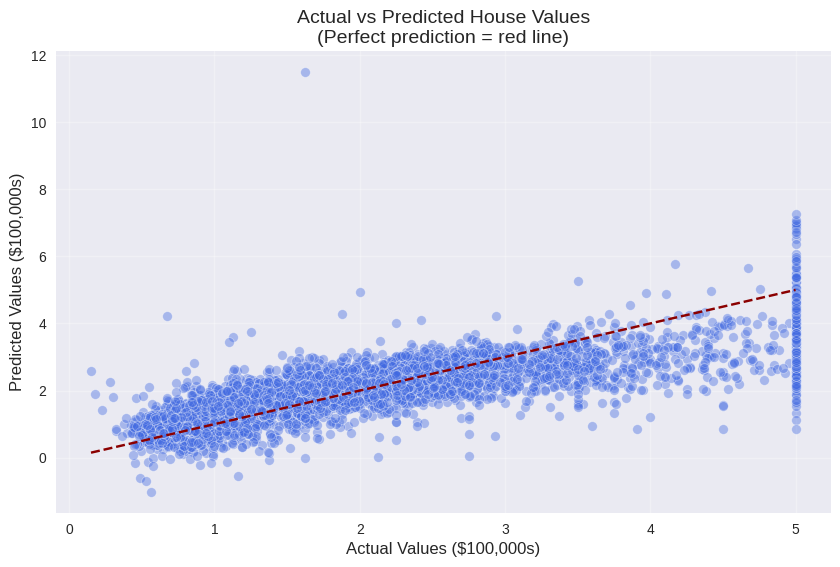

In [ ]:
# 6. Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
print("\n\nSTEP 6: VISUALIZATIONS")
plt.style.use('seaborn-v0_8')
# Plot 1: Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, color='royalblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='darkred')
plt.title('Actual vs Predicted House Values\n(Perfect prediction = red line)', fontsize=14)
plt.xlabel('Actual Values ($100,000s)', fontsize=12)
plt.ylabel('Predicted Values ($100,000s)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

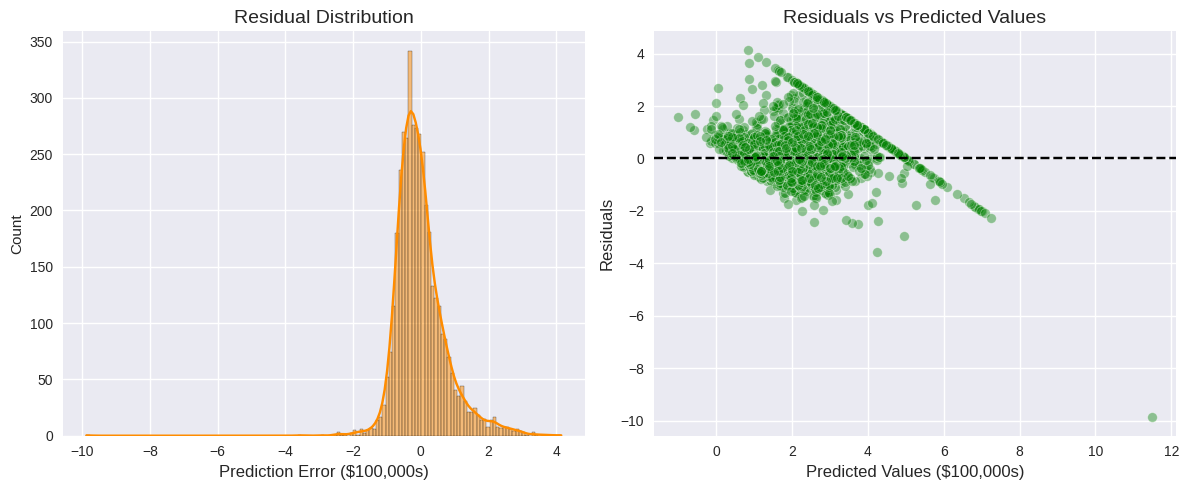

In [ ]:
# Plot 2: Residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='darkorange')
plt.title('Residual Distribution', fontsize=14)
plt.xlabel('Prediction Error ($100,000s)', fontsize=12)
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred, y=residuals, alpha=0.4, color='green')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.xlabel('Predicted Values ($100,000s)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.tight_layout()
plt.show()